# DSCI 100 Group Project Proposal

Team: Nicolas Mercuri, Tayler Whitehead, Chris Lukita, Stephanie Song

## Part 1: Introduction

Music plays a huge role in our experience of the world around us. Daily tasks like walking through campus, working on homework assignments, or simply cooking dinner after a long day, are a lot more enjoyable while listening to your favourite playlist.

For our group project this semester, we decided to work with a dataset called [Spotify Tracks DB](https://tinyurl.com/3dnwcpe2). This dataset was downloaded from Kaggle.com and was parsed using Spotify's official API. The dataset has over 110,000 unique observations (tracks) and features 18 relevant variables, each describing a specific qualitative or quantitative characteristic of a track.

For our predictive question, we are asking if specific quantitative characteristics of a track (danceability, energy, tempo) can help predict a new song's popularity on the music streaming service, Spotify.

While we acknowledge that there is also an array of qualitative factors that contribute to a song's popularity such as culture, seasonality, and personal preference, and therefore must not be dismissed, these qualitative factors affect a song's popularity following its release (Lee & Lee, 2018). Our analysis, then, offers the opportunity to explore how quantitative variables can potentially play a role in predicting the popularity of a song before its initial release. 

## Part 2: Preliminary Exploratory Data Analysis

### Reading in Raw Data + Getting Random Sample for Vizualizations

First, we load any necessary packages required for our data cleaning and wrangling, initial anlyses, and visualizations. Then we read in our chosen dataset from our GitHub repository.

In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

options(repr.plot.width= 30, repr.plot.height= 10)

In [7]:
spotify_raw_data = read_csv("https://raw.githubusercontent.com/chrislukita/DSCI100-Group-Final/main/data/SpotifyDataset.csv")

Parsed with column specification:
cols(
  genre = col_character(),
  artist_name = col_character(),
  track_name = col_character(),
  track_id = col_character(),
  popularity = col_double(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  key = col_character(),
  liveness = col_double(),
  loudness = col_double(),
  mode = col_character(),
  speechiness = col_double(),
  tempo = col_double(),
  time_signature = col_character(),
  valence = col_double()
)

Warning message:
“1 parsing failure.
   row col   expected     actual                                                                                             file
115177  -- 18 columns 15 columns 'https://raw.githubusercontent.com/chrislukita/DSCI100-Group-Final/main/data/SpotifyDataset.csv'
”


### Cleaning and Wrangling Data

We first wrangle the data to only include relevant numerical metrics, and then remove any NA values that may be present.

In [1]:
spotify_wrangled = spotify_raw_data %>%
                    select(popularity: instrumentalness, liveness, loudness, speechiness, tempo, valence) %>%
                    na.omit(spotify_wrangled)

ERROR: Error in spotify_raw_data %>% select(popularity:instrumentalness, liveness, : could not find function "%>%"


From here, we create a factor column called "popular" which denotes if a song is considered popular or not. For the purposes of our analysis, we determined that a song is popular if its popularity score is greater than or equal to 70 (out of 100).

In [2]:
spotify_wrangled = spotify_wrangled %>%
                    mutate(popular = popularity >= 70) %>%
                    mutate(popular = as.factor(popular))

levels(spotify_wrangled$popular)[2] <- 'Yes'
levels(spotify_wrangled$popular)[1] <- 'No'

ERROR: Error in spotify_wrangled %>% mutate(popular = popularity >= 70) %>% mutate(popular = as.factor(popular)): could not find function "%>%"


To note: 'Yes' means the song is popular and 'No' means the song is not popular, according to how we have decided to classify popularity.

### Creating Training Data

Now that we have our relevant popularity scores, we can create our training dataset which comprises 75% of the total wrangled Spotify dataset. The remaining 25% will be used as our testing dataset.

In [10]:
spotify_split = initial_split(spotify_wrangled, prop = 0.75, strata = popular)

spotify_train = training(spotify_split)
spotify_test = testing(spotify_split)

### Summarizing the Data

Here we provide the summary statistics of all the quantitative variables included in the dataset. It should be noted, however, that our analysis will only be referring to the following variables: popularity, danceability, energy, and tempo where popularity is measured on a scale from 0-100, danceability and energy have been standardized to a scale of 0-1, and tempo is measured in beats per minute (BPM). 

In [11]:
summary(spotify_train)

   popularity     acousticness     danceability     duration_ms     
 Min.   : 0.00   Min.   :0.0000   Min.   :0.0592   Min.   :  15387  
 1st Qu.:31.00   1st Qu.:0.0244   1st Qu.:0.4520   1st Qu.: 186333  
 Median :47.00   Median :0.1700   Median :0.5790   Median : 221200  
 Mean   :42.93   Mean   :0.3230   Mean   :0.5676   Mean   : 231880  
 3rd Qu.:57.00   3rd Qu.:0.5980   3rd Qu.:0.6960   3rd Qu.: 262846  
 Max.   :99.00   Max.   :0.9960   Max.   :0.9890   Max.   :4830606  
     energy         instrumentalness       liveness          loudness      
 Min.   :0.000499   Min.   :0.0000000   Min.   :0.00967   Min.   :-46.507  
 1st Qu.:0.411000   1st Qu.:0.0000000   1st Qu.:0.09740   1st Qu.:-10.694  
 Median :0.616000   Median :0.0000492   Median :0.12800   Median : -7.304  
 Mean   :0.587389   Mean   :0.1139149   Mean   :0.19524   Mean   : -8.750  
 3rd Qu.:0.797000   3rd Qu.:0.0169750   3rd Qu.:0.24500   3rd Qu.: -5.212  
 Max.   :0.999000   Max.   :0.9970000   Max.   :1.00000   Max

### Visualizing the Data

To visualize our data, we will create histograms to show the distribution of values of our main predictive variables: danceability, energy, and tempo.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



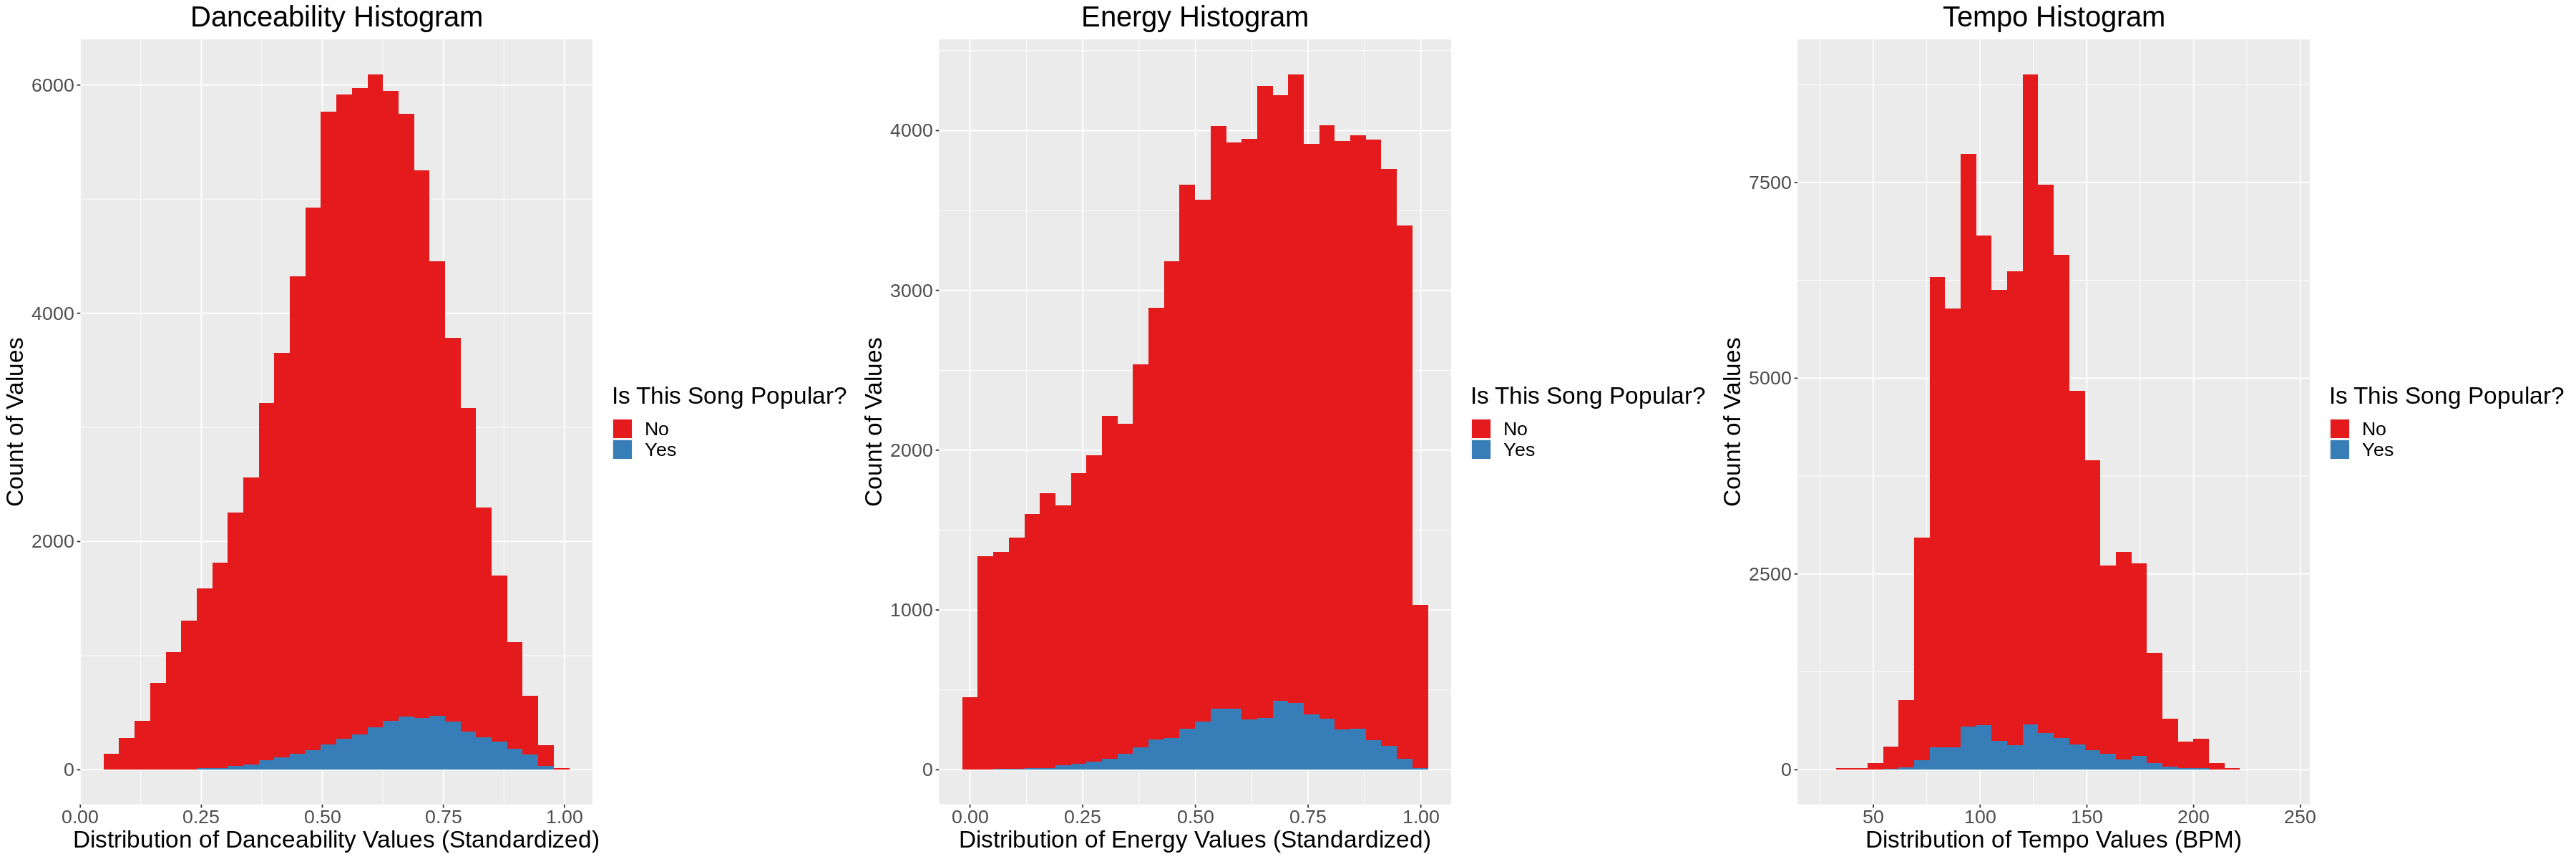

In [12]:
danceability_histogram = spotify_train %>%
                        ggplot(aes(x = danceability, fill = popular)) +
                        geom_histogram() +
                        labs(x = "Distribution of Danceability Values (Standardized)", y = "Count of Values"
                            , fill = "Is This Song Popular?") + 
                        ggtitle("Danceability Histogram") +
                        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5)) + 
                        scale_fill_brewer(palette = "Set1")
                        
energy_histogram = spotify_train %>%
                        ggplot(aes(x = energy, fill = popular)) +
                        geom_histogram() +
                        labs(x = "Distribution of Energy Values (Standardized)", y = "Count of Values"
                             , fill = "Is This Song Popular?") + 
                        ggtitle("Energy Histogram") +
                        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5)) + 
                        scale_fill_brewer(palette = "Set1")

tempo_histogram = spotify_train %>%
                        ggplot(aes(x = tempo, fill = popular)) +
                        geom_histogram() +
                        labs(x = "Distribution of Tempo Values (BPM)", y = "Count of Values"
                            , fill = "Is This Song Popular?") + 
                        ggtitle("Tempo Histogram") +
                        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5)) + 
                        scale_fill_brewer(palette = "Set1")

plot_grid(danceability_histogram, energy_histogram, tempo_histogram, ncol = 3)

We can see that the danceability and tempo values follow a normal distribution, while the energy distributions are skewed to the right. Additionally, the distribution of popular songs within danceability and energy also skew to the right while within tempo, the distribution is skewed right.

## Part 3: Methods

**How will we coduct our data analysis?**

Our data analysis will adhere to the following structure and format:
- Step #1 - Split the data into a training and testing data, respectively. We'll be careful to use relevant proportions of the total data for each set.
- Step #2 - Utilize the vfold_cv function to split our training data for cross-validation.
- Step #3 - Develop our KNN recipe using relevant class labels and predictors.
- Step #4 - Build our nearest neighbors model specification, ensuring that the neighbors parameter is set to tune().
- Step #5 - Create workflow using the recipe and model developed in steps 3 and 4.
- Step #6 - Choose an optimal K value from this workflow analysis.
- Step #7 - Develop a new model specification using the optimal value for K, and then retrain the classifier using fit.
- Step #8 - Evaluate accuracy using the testing data.
- Step #9 - Develop some visualizations that summarize our analysis, and draft any documentation required to aid understanding of our processes.

**Which variables are most important for our analysis?**

We expect to rely primarily on the following quantitative variables to predict popularity: danceability, energy, and tempo. 

**How will we visualize results?**

As our prediction algorithm will be dealing with quantitative data, a scatterplot will be useful for visualizing the datapoints within our dataset. The scatterplot will have one of the three chosen metrics (danceability, energy, and tempo) on the x-axis and another on the y-axis. Furthermore, we will colour the data points to indicate which songs are considered popular and which ones are not popular.

## Part 4: Expected Outcomes and Significance

**What do we expect to find?**

At first glance, we expect to find that new songs with higher ratings of danceability, energy, and tempo will likely score higher in popularity compared to songs that have lower ratings in these predictive variables. We are hoping to find patterns within the data that may either support this or suggest other possibilities. However, it will be interesting to dive further into this analysis as it is our hope that our assumptions will be challenged and stretched.

**What impact could these findings have?**

Our findings could help artists and producers understand the metrics that make music listeners really connect with a song. Making music is both an art and a science, and we hope that our analysis can provide artists and producers with the potential to uncover insights to help them create new music that will resonate with listeners on Spotify and other streaming services. Our findings also have the potential to be used in combination with marketing strategies whereby marketing teams may want to consider using songs that are predicted to be popular in their advertisements in order to entice consumers even more (Lee & Lee, 2018).

**What future questions could this lead to?**

As this dataset is unique to the listening habits of Spotify users, it would be interesting to compare these results with data from other popular streaming services, like Apple Music, Amazon Music, and Youtube Music, respectively, to see if the metrics reported on these music streaming services provide similar results. There is also oppurtunity to analyze the relationship between song popularity and other quantitative metrics not considered in this project. Furthermore, it may also be interesting to research the role these metrics play in current music production to determine if artists and producers already consider these metrics when creating new songs. 

**References:**
Lee, J., & Lee, J. (2018). Music popularity: Metrics, characteristics, and audio-based prediction. *IEEE Transactions on Multimedia, 20*(11), 3173-3182. https://doi.org/10.1109/TMM.2018.2820903